### Jonathan Bunch

13 October 2021

Bellevue University

DSC550-T301

---

# Titanic Case Study Part 2

### 11. Some of my questions have been answered by seeing the charts but in some ways, looking at this much data has created even more questions.

### a. Now it’s time to reduce some of the features so we can concentrate on the things that matter!  There features we will get rid of are:  "PassengerId", "Name", "Ticket" and "Cabin".

In [2]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data set.
titanic_raw = pd.read_csv("train.csv")

# Quick check of the dataframe.
titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# I will start by making a list of features we intend to drop.
feat_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]

# Create a subset with the desired features removed.
t_sub_1 = titanic_raw.copy().drop(columns=feat_to_drop)

# Check the results.
t_sub_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### b. We can also fill in missing values.  Age has some missing values so I’ll fill in with the average age.  Embarked also has some missing so I’ll the most common.

In [4]:
# Let's start by quantifying the number of NA values for each feature.
print("NA Value Counts Pre-Replacement:\n", t_sub_1.isna().sum(), "\n")

NA Value Counts Pre-Replacement:
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64 



In [5]:
# First, I will find the most common value (mode) for the "Embarked" feature, and use it to fill NA values.
# This method returns a series, so I will select the zero-index value (the only value in the series).
embarked_mode = t_sub_1.Embarked.mode()[0]

# The Age feature is missing quite a few values; we will replace them with the mean value for Age.
age_mean = t_sub_1.Age.mean()

# The Pandas "fillna()" method is very useful for replacing NA values. It can accept a dictionary in the form of
# "column name: replacement value".
na_fill_vals = {'Embarked': embarked_mode, 'Age': age_mean}

# Apply the method to create a new subset.
t_sub_2 = t_sub_1.fillna(na_fill_vals)

# Check the results.
print("NA Value Counts Post-Replacement:\n", t_sub_2.isna().sum())

NA Value Counts Post-Replacement:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### 12. If you go back and look at the histograms of Fare, you’ll see that it is very skewed…many low cost fares, not very many high cost fares.  Log Transformation is a good method to use on highly skewed data.

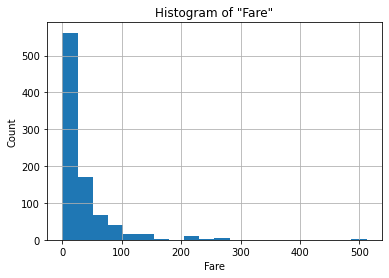

In [11]:
# Check the histogram of the original 'Fare' feature.
t_sub_2.Fare.hist(bins=20)
plt.title('Histogram of "Fare"')
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

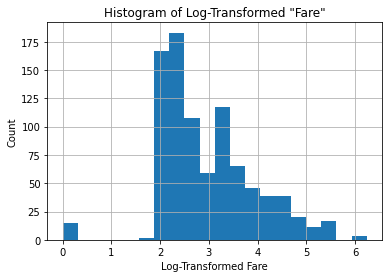

In [12]:
# Create a new column with the log-transformed Fare values.
t_sub_2['log_fare'] = np.log1p(t_sub_2['Fare'])

# Check the histogram of the log-transformed verion of Fare.
t_sub_2.log_fare.hist(bins=20)
plt.title('Histogram of Log-Transformed "Fare"')
plt.xlabel("Log-Transformed Fare")
plt.ylabel("Count")
plt.show()

### 13. Convert your categorical data into numbers (Sex, PClass, Embark)

In [7]:
# First, let's take another look at the data types.
print(t_sub_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   log_fare  891 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 62.8+ KB
None


In [8]:
# It looks like all of our features are already in a numeric format except for Sex and Embarked.
# I will start with the Sex variable. One method is to use the get_dummies method. With a binary variable, we can
# simply drop one of the columns. I will create a new column with 1s representing males.
t_sub_2['sex_males_one'] = pd.get_dummies(t_sub_2['Sex'], drop_first=True)

# Just for consistency, I will change the new column's datatype from uint8 to int64.
t_sub_2['sex_males_one'] = t_sub_2['sex_males_one'].astype(np.int64)

# Check the data types again.
print(t_sub_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       891 non-null    object 
 8   log_fare       891 non-null    float64
 9   sex_males_one  891 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 69.7+ KB
None


In [9]:

# Another possible method would be to create a custom function.  I will try this technique for Embarked.
# Since these are categories with no logical order, it doesn't matter which number represents which category.
def dummy_embark(cat):
    if cat == 'S':
        val = 0
    elif cat == 'C':
        val = 1
    else:
        val = 2
    return val


# Now I will apply the function to the feature and put the results in a new column.
t_sub_2['embarked_dummy'] = t_sub_2.Embarked.apply(dummy_embark)

# Check the results.
print(t_sub_2.info())
t_sub_2.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    object 
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Embarked        891 non-null    object 
 8   log_fare        891 non-null    float64
 9   sex_males_one   891 non-null    int64  
 10  embarked_dummy  891 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB
None


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,log_fare,sex_males_one,embarked_dummy
0,0,3,male,22.000000,1,0,7.2500,S,2.110213,1,0
1,1,1,female,38.000000,1,0,71.2833,C,4.280593,0,1
2,1,3,female,26.000000,0,0,7.9250,S,2.188856,0,0
3,1,1,female,35.000000,1,0,53.1000,S,3.990834,0,0
4,0,3,male,35.000000,0,0,8.0500,S,2.202765,1,0
5,0,3,male,29.699118,0,0,8.4583,Q,2.246893,1,2
6,0,1,male,54.000000,0,0,51.8625,S,3.967694,1,0


In [10]:
# If desired, we can drop the original versions of those features.
t_sub_3 = t_sub_2.copy().drop(columns=['Sex', 'Fare', 'Embarked'])

# Check the final results.
print(t_sub_3.info())
t_sub_3.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Age             891 non-null    float64
 3   SibSp           891 non-null    int64  
 4   Parch           891 non-null    int64  
 5   log_fare        891 non-null    float64
 6   sex_males_one   891 non-null    int64  
 7   embarked_dummy  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None


,Survived,Pclass,Age,SibSp,Parch,log_fare,sex_males_one,embarked_dummy
0,0,3,22.000000,1,0,2.110213,1,0
1,1,1,38.000000,1,0,4.280593,0,1
2,1,3,26.000000,0,0,2.188856,0,0
3,1,1,35.000000,1,0,3.990834,0,0
4,0,3,35.000000,0,0,2.202765,1,0
5,0,3,29.699118,0,0,2.246893,1,2
6,0,1,54.000000,0,0,3.967694,1,0
